## ПРАКТИЧНА РОБОТА 7.1

### Варіант 15

##### Завдання 1. Кластеризація даних

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Зчитати CSV файл
df = pd.read_csv("shopping_trends.csv", encoding='latin-1')

print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [3]:
#Визначте кількість рядків і стовпчиків за допомогою атрибуту shape 
num_rows, num_columns = df.shape

print(f"Кількість рядків: {num_rows}, Кількість стобчиків: {num_columns}")

Кількість рядків: 3900, Кількість стобчиків: 19


In [4]:
#Визначте тип даних
print("Тип даних: \n", df.dtypes)

Тип даних: 
 Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object


In [5]:
#Визначити кількість пропусків
missing_sum = df.isnull().sum()

print("Сума пропусків в кожній колонці: ")
print(missing_sum)

Сума пропусків в кожній колонці: 
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [6]:
#Підготовка даних
numerical_features = df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]

print(numerical_features.head())

   Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0   55                     53            3.1                  14
1   19                     64            3.1                   2
2   50                     73            3.1                  23
3   21                     90            3.5                  49
4   45                     49            2.7                  31


In [7]:
#Масштабування даних
scaled_df = StandardScaler().fit_transform(numerical_features)

print(scaled_df)

[[ 0.71891344 -0.28562864 -0.90758357 -0.78583067]
 [-1.64862924  0.17885219 -0.90758357 -1.61655226]
 [ 0.39008807  0.55888195 -0.90758357 -0.16278948]
 ...
 [ 0.12702777 -1.13013923 -1.18686209 -0.09356268]
 [-0.00450238  0.72778407  0.06989124 -0.09356268]
 [ 0.52161822  0.89668619 -0.90758357  0.52947851]]


In [12]:
#Використання оптимальної кількості кластерів за допомогою метода ліктя
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

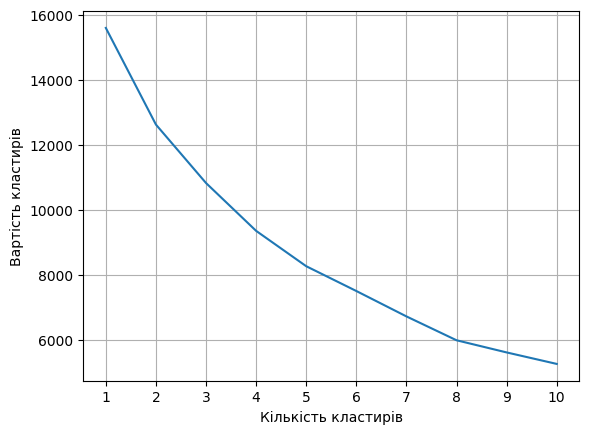

In [9]:
#Побудова графіка методу ліктя
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Кількість кластирів")
plt.ylabel("Вартість кластирів")
plt.grid(True)
plt.show()

In [10]:
#Використання оптимальної кількості кластерів для запуску алгоритму K-means. Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера. 
optional_clusters = 2
kmeans = KMeans(n_clusters=optional_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_df)

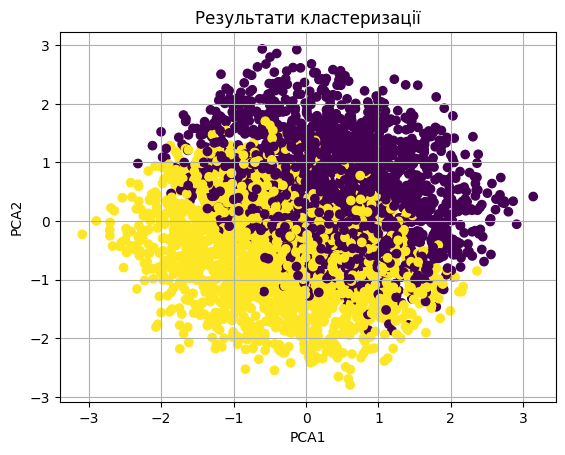

In [11]:
#Використання РСА для візуалізації даних
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'])
plt.title('Результати кластеризації')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()

Висновок: На практичній роботі я навчилася використовувати метод ліктя, щоб визначати оптимальну кількість кластерів та практикувати кластеризацію за допомогою K-means.